<a href="https://colab.research.google.com/github/uzdanska/Machine-Learning/blob/main/supervised/01_basics/04_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn

Strona biblioteki: https://scikit-learn.org

Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn

```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję 0.22.1

### Preprocessing danych:


1.   [Import bibliorek](#0)
2.   [Załadowanie danych](#1)
3.   [Przygotowanie danych](#2)
4.   [Podział danych na zbiór treningowy i testowy - iris data](#3)
5.   [Podział danych na zbiór treningowy i testowy - breast cancer data](#4)
6.   [Równy podział ze względu na zmienną docelową](#5)

### <a name="0"></a> 1. Import bibliotek

In [30]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

sklearn.__version__

'1.2.2'

Ustawienie ziarna losowego

In [31]:
np.random.seed(42)

Ustawienie opcje drukowania do konsoli

In [32]:
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x: 2f}'))

Ustawienie bibliotekę seaborn jako domyślny motyw

In [33]:
sns.set()

### <a name="1"></a> 2. Załadowanie danych oraz przypisanie ich

In [34]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Wypisanie DESCR zmienna opisująca

In [35]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### <a name="2"></a> 3. Przygotowanie danych

In [36]:
data = raw_data_copy['data']
target = raw_data_copy['target']

Wyświetlenie 5 pierwszych wartości data i target

In [37]:
data[:5]

array([[ 5.100000,  3.500000,  1.400000,  0.200000],
       [ 4.900000,  3.000000,  1.400000,  0.200000],
       [ 4.700000,  3.200000,  1.300000,  0.200000],
       [ 4.600000,  3.100000,  1.500000,  0.200000],
       [ 5.000000,  3.600000,  1.400000,  0.200000]])

In [38]:
target[:5]

array([0, 0, 0, 0, 0])

Połączenie atrybutów ze zmienną docelową wykorzystując np.c_

In [39]:
all_data = np.c_[data, target]
all_data[:5]

array([[ 5.100000,  3.500000,  1.400000,  0.200000,  0.000000],
       [ 4.900000,  3.000000,  1.400000,  0.200000,  0.000000],
       [ 4.700000,  3.200000,  1.300000,  0.200000,  0.000000],
       [ 4.600000,  3.100000,  1.500000,  0.200000,  0.000000],
       [ 5.000000,  3.600000,  1.400000,  0.200000,  0.000000]])

Budowa obiektu DataFrame

In [40]:
df = pd.DataFrame(data = all_data, columns = raw_data.feature_names + ["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Wyświetlenie 5 ostatnich wierszy

In [41]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


Wyświetlenie informacji o obiekcie DataFrame

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Proste statystyki

In [43]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Proste statystyki jako Transpozycja i wartości zaokrąglone do 2 miejsc po przecinku

In [44]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


rozklad zmiennej docelowej (target)

In [45]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

<Axes: ylabel='target'>

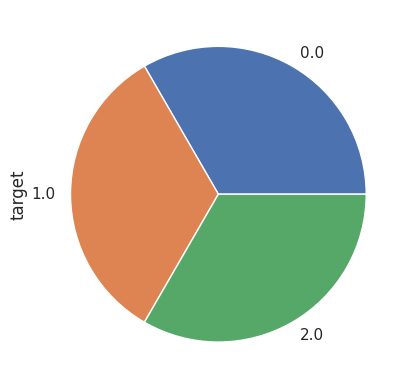

In [46]:
df.target.value_counts().plot(kind="pie")

Rozdział zmiennych opisujących (data) i zmienną docelową (target)

In [47]:
data = df.copy()
target = data.pop('target')

In [48]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

### <a name="3"></a> 4. Podział danych na zbiór treningowy i testowy - iris data



random_state - wartosc ziarna losowego

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej")
print(f'\ny_train: \n{y_train.value_counts()}')
print(f'\ny_test: \n{y_test.value_counts()}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)
Test ratio: 0.25

Rozkłady zmiennej docelowej

y_train: 
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test: 
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64


dodanie test_size który domyślnie jest na 0.25  ustawiamy na 0.3, czyli 30% danych to są dane testowe

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej")
print(f'\ny_train: \n{y_train.value_counts()}')
print(f'\ny_test: \n{y_test.value_counts()}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (105, 4)
y_train shape (105,)
X_test shape (45, 4)
y_test shape (45,)
Test ratio: 0.30

Rozkłady zmiennej docelowej

y_train: 
2.0    37
0.0    35
1.0    33
Name: target, dtype: int64

y_test: 
1.0    17
0.0    15
2.0    13
Name: target, dtype: int64


przekaznie parametru train_size

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.9, random_state = 42)

print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej")
print(f'\ny_train: \n{y_train.value_counts()}')
print(f'\ny_test: \n{y_test.value_counts()}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)
Test ratio: 0.10

Rozkłady zmiennej docelowej

y_train: 
2.0    46
0.0    45
1.0    44
Name: target, dtype: int64

y_test: 
1.0    6
0.0    5
2.0    4
Name: target, dtype: int64


Równy podział ze wzgledu na zmienną docelową np problem wykrycia terrorysty na lotnisko, wtedy danych  jest mało wiec rozsądnie jest podzielić na pół za pomocą dodania **stratify = target**. Warto stosować gdy jest coś bardzo rzadkiego

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size=0.1, stratify=target)

print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej")
print(f'\ny_train: \n{y_train.value_counts()}')
print(f'\ny_test: \n{y_test.value_counts()}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)
Test ratio: 0.10

Rozkłady zmiennej docelowej

y_train: 
0.0    45
2.0    45
1.0    45
Name: target, dtype: int64

y_test: 
1.0    5
2.0    5
0.0    5
Name: target, dtype: int64


### <a name="4"></a> 5. Podział danych na zbiór treningowy i testowy - breast cancer data



random_state - wartosc ziarna losowego

#### <a name="4_1"></a> 5.1. Ładowanie danych, tworzenie kopii i wyswietlanie zawartości słownika

In [55]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Wyświetlenie informacji o danych:

In [57]:
print(raw_data_copy['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Wycięcie 5 pierwszych wartości ze zmiennych opisujących jak i docelowych:

In [58]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[ 17.990000  10.380000  122.800000  1001.000000  0.118400  0.277600  0.300100  0.147100  0.241900  0.078710  1.095000  0.905300  8.589000  153.400000  0.006399  0.049040  0.053730  0.015870  0.030030  0.006193  25.380000  17.330000  184.600000  2019.000000  0.162200  0.665600  0.711900  0.265400  0.460100  0.118900]
 [ 20.570000  17.770000  132.900000  1326.000000  0.084740  0.078640  0.086900  0.070170  0.181200  0.056670  0.543500  0.733900  3.398000  74.080000  0.005225  0.013080  0.018600  0.013400  0.013890  0.003532  24.990000  23.410000  158.800000  1956.000000  0.123800  0.186600  0.241600  0.186000  0.275000  0.089020]
 [ 19.690000  21.250000  130.000000  1203.000000  0.109600  0.159900  0.197400  0.127900  0.206900  0.059990  0.745600  0.786900  4.585000  94.030000  0.006150  0.040060  0.038320  0.020580  0.022500  0.004571  23.570000  25.530000  152.500000  1709.000000  0.144400  0.424500  0.450400  0.243000  0.361300  0.087580]
 [ 11.420000  20.380000  77.580000  386.10000

Połączenie danych ze zmienną docelową

In [59]:
all_data = np.c_[data, target]
all_data[:5]

array([[ 17.990000,  10.380000,  122.800000,  1001.000000,  0.118400,  0.277600,  0.300100,  0.147100,  0.241900,  0.078710,  1.095000,  0.905300,  8.589000,  153.400000,  0.006399,  0.049040,  0.053730,  0.015870,  0.030030,  0.006193,  25.380000,  17.330000,  184.600000,  2019.000000,  0.162200,  0.665600,  0.711900,  0.265400,  0.460100,  0.118900,  0.000000],
       [ 20.570000,  17.770000,  132.900000,  1326.000000,  0.084740,  0.078640,  0.086900,  0.070170,  0.181200,  0.056670,  0.543500,  0.733900,  3.398000,  74.080000,  0.005225,  0.013080,  0.018600,  0.013400,  0.013890,  0.003532,  24.990000,  23.410000,  158.800000,  1956.000000,  0.123800,  0.186600,  0.241600,  0.186000,  0.275000,  0.089020,  0.000000],
       [ 19.690000,  21.250000,  130.000000,  1203.000000,  0.109600,  0.159900,  0.197400,  0.127900,  0.206900,  0.059990,  0.745600,  0.786900,  4.585000,  94.030000,  0.006150,  0.040060,  0.038320,  0.020580,  0.022500,  0.004571,  23.570000,  25.530000,  152.5000

Budowa obiektu DataFrame

In [69]:
df = pd.DataFrame(data=all_data, columns=list(raw_data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Rozkład zmiennej target

In [70]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

Rozkład nie jest równy klasa 0 pojawia się 212 razy natomiast klasa 1 357 razy.

Wiec aby klasa pierwsza niezdominowała nam tego modelu wygodniej jest go podzielić warstwowo

Przygotowanie danych do podziału czyli rozdziała data i target:

In [74]:
data = df.copy()
target = data.pop('target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

Podział na zbiór testowy i treningowy:

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25)

print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej - procentowy podział")
print(f'\ntarget: \n{target.value_counts()/len(target)}')
print(f'\ny_train: \n{y_train.value_counts()/len(y_train)}')
print(f'\ny_test: \n{y_test.value_counts()/len(y_test)}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)
Test ratio: 0.25

Rozkłady zmiennej docelowej - procentowy podział

target: 
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train: 
1.0    0.607981
0.0    0.392019
Name: target, dtype: float64

y_test: 
1.0    0.685315
0.0    0.314685
Name: target, dtype: float64


### <a name="5"></a> 6. Równy podział ze względu na zmienną docelową

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25, stratify=target)

print("Kształty - rozmiary zbiorów treningowych i testowych:")
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'Test ratio: {len(X_test) / len(data):.2f}')
print("\nRozkłady zmiennej docelowej - procentowy podział")
print(f'\ntarget: \n{target.value_counts()/len(target)}')
print(f'\ny_train: \n{y_train.value_counts()/len(y_train)}')
print(f'\ny_test: \n{y_test.value_counts()/len(y_test)}')

Kształty - rozmiary zbiorów treningowych i testowych:
X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)
Test ratio: 0.25

Rozkłady zmiennej docelowej - procentowy podział

target: 
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train: 
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test: 
1.0    0.629371
0.0    0.370629
Name: target, dtype: float64


Jeżeli mamy dane które są niezbalansowane pod względem klas to lepiej pamiętajmy o tym aby ten podział dokonać za pomocą stratify